In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime

pd.options.display.float_format = '{:.5f}'.format
bus_bts = pd.read_csv("bus_bts.csv")
train = pd.read_csv("train.csv")
submission = pd.read_csv("submission_sample.csv")
rain = pd.read_csv("rain.csv",encoding='euc-kr')

In [2]:
rain.columns = ['지점', '지점명', '일시', '강수량', 'QC']

#오류인 관측치를 0으로 대체
rain2 = rain.fillna(0)

#일시를 기준으로 정렬
rain2 = rain2.sort_values(by='일시')
rain2 = rain2.reset_index()

#6시~12시 관측값만 남기기
rain2 = rain2[rain2['일시'].str.contains('07:|08:|09:|10:|11:|12:')]

#동시간 네지역 강수량을 합치기
for i in range (0,len(rain2)-1) :
    if (rain2.iloc[i,3] == rain2.iloc[i+1, 3]) :
        rain2.iloc[i+1,4] += rain2.iloc[i,4]
        
rain2 = rain2.drop_duplicates(['일시'])

#6시~12시 강수량을 일별로 모두 합치기
day_rain = rain2
for i in range (0,len(day_rain)-1) :
    if i%6==5 :
        continue
    else :
        day_rain.iloc[i+1,4] += day_rain.iloc[i,4]
        
day_rain = day_rain.reset_index()
day_rain = day_rain.drop(['index'],axis=1)

for i in range(0,len(day_rain)-1) :
    if i%6==5:
        continue
    else:
        day_rain = day_rain.drop(index=i,axis=0)

day_rain = day_rain.reset_index()

In [3]:
day_rain["일시"] = pd.to_datetime(day_rain.일시,format='%Y-%m-%d %H:%M')
day_rain["일시"]= day_rain["일시"].dt.date
day_rain = day_rain.drop(['index','level_0','지점명','지점','QC'], axis=1)

In [4]:
day_rain["일시"] = pd.to_datetime(day_rain.일시, format="%Y-%m-%d")

In [5]:
day_rain

,일시,강수량
0,2019-09-01,0.00000
1,2019-09-02,15.30000
2,2019-09-03,6.40000
3,2019-09-04,80.60000
4,2019-09-05,1.70000
5,2019-09-06,2.10000
6,2019-09-07,0.00000
7,2019-09-08,0.30000
8,2019-09-09,10.20000
9,2019-09-11,0.00000


In [6]:
day_rain = pd.DataFrame({"일시": pd.date_range("2019-09-01", "2019-09-30", freq="D"),
                          "강수량": [0.0, 15.3, 6.4, 80.6, 1.7, 2.1, 0.0, 0.3, 10.2, np.nan, 0.0, 0.0, np.nan, np.nan, np.nan, 0.0, 
                                   np.nan, np.nan, np.nan, np.nan, 10.6, 21.2, 0.0, np.nan, np.nan, 0.6, 1.7, np.nan, 0.0, 0.0]})

In [7]:
day_rain

,일시,강수량
0,2019-09-01,0.00000
1,2019-09-02,15.30000
2,2019-09-03,6.40000
3,2019-09-04,80.60000
4,2019-09-05,1.70000
5,2019-09-06,2.10000
6,2019-09-07,0.00000
7,2019-09-08,0.30000
8,2019-09-09,10.20000
9,2019-09-10,NaN


In [8]:
day_rain['강수량'] = day_rain["강수량"].interpolate()

In [9]:
day_rain.columns = ['date', 'rain']
day_rain

,date,rain
0,2019-09-01,0.00000
1,2019-09-02,15.30000
2,2019-09-03,6.40000
3,2019-09-04,80.60000
4,2019-09-05,1.70000
5,2019-09-06,2.10000
6,2019-09-07,0.00000
7,2019-09-08,0.30000
8,2019-09-09,10.20000
9,2019-09-10,5.10000


In [10]:
#비 안옴(0), 약한 비(1), 강한 비(2) 로 구분
rain_class = []

for i in range (len(day_rain)):
    if (day_rain.iloc[i,1] == 0):
        rain_class.append(0)
    elif (day_rain.iloc[i,1] <= 18) :
        rain_class.append(1)
    elif (day_rain.iloc[i,1] > 18):
        rain_class.append(2)

day_rain["rain_class"] = rain_class

In [11]:
pd.get_dummies(day_rain, columns=['rain_class'])

,date,rain,rain_class_0,rain_class_1,rain_class_2
0,2019-09-01,0.00000,1,0,0
1,2019-09-02,15.30000,0,1,0
2,2019-09-03,6.40000,0,1,0
3,2019-09-04,80.60000,0,0,1
4,2019-09-05,1.70000,0,1,0
5,2019-09-06,2.10000,0,1,0
6,2019-09-07,0.00000,1,0,0
7,2019-09-08,0.30000,0,1,0
8,2019-09-09,10.20000,0,1,0
9,2019-09-10,5.10000,0,1,0


In [12]:
mount = []
for i in range(len(train.latitude)) :
    if ((126.35 < train.iloc[i,7] < 126.72) & (33.3 < train.iloc[i,6] < 33.44)) :
        mount.append(1)
    else :
        mount.append(0)
        
mount = pd.DataFrame(mount)
train = pd.concat([mount,train],axis=1)
train.rename(columns={0:'mount'}, inplace=True)

In [13]:
train

,mount,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.00000,...,5.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.00000,...,2.00000,5.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000
2,0,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.00000,...,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000
3,0,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.00000,...,26.00000,14.00000,16.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53.00000
4,0,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415419,0,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415420,0,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415421,0,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [14]:
train["date"] = pd.to_datetime(train.date,format='%Y-%m-%d')

In [15]:
train = pd.merge(day_rain,train, on='date', how='inner')

In [16]:
train

,date,rain,rain_class,mount,id,bus_route_id,in_out,station_code,station_name,latitude,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,2019-09-01,0.00000,0,0,0,4270000,시외,344,제주썬호텔,33.48990,...,5.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2019-09-01,0.00000,0,0,1,4270000,시외,357,한라병원,33.48944,...,2.00000,5.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000
2,2019-09-01,0.00000,0,0,2,4270000,시외,432,정존마을,33.48181,...,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000
3,2019-09-01,0.00000,0,0,3,4270000,시내,1579,제주국제공항(600번),33.50577,...,26.00000,14.00000,16.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,53.00000
4,2019-09-01,0.00000,0,0,4,4270000,시내,1646,중문관광단지입구,33.25579,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,0.00000,0,0,415418,32820000,시내,1129,한림환승정류장(한림리),33.41437,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415419,2019-09-30,0.00000,0,0,415419,32820000,시내,1564,제주시외버스터미널,33.49946,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415420,2019-09-30,0.00000,0,0,415420,32820000,시내,2322,해병부대,33.23100,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415421,2019-09-30,0.00000,0,0,415421,32820000,시내,3291,애월환승정류장(애월리),33.46483,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## 로그변환

In [17]:
to_log_col = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride' ]
for col in to_log_col:
    train[col] = np.log1p(train[col])

In [18]:
train

,date,rain,rain_class,mount,id,bus_route_id,in_out,station_code,station_name,latitude,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,2019-09-01,0.00000,0,0,0,4270000,시외,344,제주썬호텔,33.48990,...,1.79176,1.09861,1.94591,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2019-09-01,0.00000,0,0,1,4270000,시외,357,한라병원,33.48944,...,1.09861,1.79176,1.94591,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.79176
2,2019-09-01,0.00000,0,0,2,4270000,시외,432,정존마을,33.48181,...,1.09861,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.09861
3,2019-09-01,0.00000,0,0,3,4270000,시내,1579,제주국제공항(600번),33.50577,...,3.29584,2.70805,2.83321,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.98898
4,2019-09-01,0.00000,0,0,4,4270000,시내,1646,중문관광단지입구,33.25579,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.69315,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,0.00000,0,0,415418,32820000,시내,1129,한림환승정류장(한림리),33.41437,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415419,2019-09-30,0.00000,0,0,415419,32820000,시내,1564,제주시외버스터미널,33.49946,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
415420,2019-09-30,0.00000,0,0,415420,32820000,시내,2322,해병부대,33.23100,...,0.00000,0.00000,0.00000,0.00000,0.69315,0.00000,0.00000,0.00000,0.00000,0.00000
415421,2019-09-30,0.00000,0,0,415421,32820000,시내,3291,애월환승정류장(애월리),33.46483,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


 
## 변수선택

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [20]:
train = pd.get_dummies(train, columns=["in_out"], drop_first=True)

In [21]:
train = train.drop(['date', 'station_name'], axis=1)

In [22]:
train

,rain,rain_class,mount,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,in_out_시외
0,0.00000,0,0,0,4270000,344,33.48990,126.49373,0.00000,0.69315,...,1.09861,1.94591,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
1,0.00000,0,0,1,4270000,357,33.48944,126.48508,0.69315,1.60944,...,1.79176,1.94591,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.79176,1
2,0.00000,0,0,2,4270000,432,33.48181,126.47352,0.69315,0.69315,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.09861,1
3,0.00000,0,0,3,4270000,1579,33.50577,126.49252,0.00000,2.89037,...,2.70805,2.83321,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.98898,0
4,0.00000,0,0,4,4270000,1646,33.25579,126.41260,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.69315,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0.00000,0,0,415418,32820000,1129,33.41437,126.26336,1.60944,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
415419,0.00000,0,0,415419,32820000,1564,33.49946,126.51479,1.60944,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
415420,0.00000,0,0,415420,32820000,2322,33.23100,126.26273,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.69315,0.00000,0.00000,0.00000,0.00000,0.00000,0
415421,0.00000,0,0,415421,32820000,3291,33.46483,126.31870,0.69315,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [23]:
## 전진 선택법

variables = train.drop(['18~20_ride'],axis=1)
variables = variables.columns[:].tolist() ## 설명 변수 리스트
 
y = train['18~20_ride'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
        

C:\Users\lg\AppData\Local\Temp\ipykernel_8272\3704862530.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\lg\AppData\Local\Temp\ipykernel_8272\3704862530.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\lg\AppData\Local\Temp\ipykernel_8272\3704862530.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\lg\AppData\Local\Temp\ipykernel_8272\3704862530.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

In [24]:
len(variables)

21

In [25]:
selected_variables

['9~10_takeoff',
 '7~8_takeoff',
 '11~12_takeoff',
 '10~11_takeoff',
 '6~7_ride',
 '8~9_ride',
 'bus_route_id',
 '7~8_ride',
 '11~12_ride',
 '9~10_ride',
 '8~9_takeoff',
 '10~11_ride',
 'latitude',
 'longitude',
 '6~7_takeoff',
 'rain_class',
 'rain',
 'mount',
 'in_out_시외',
 'id']

C:\Users\lg\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lg\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


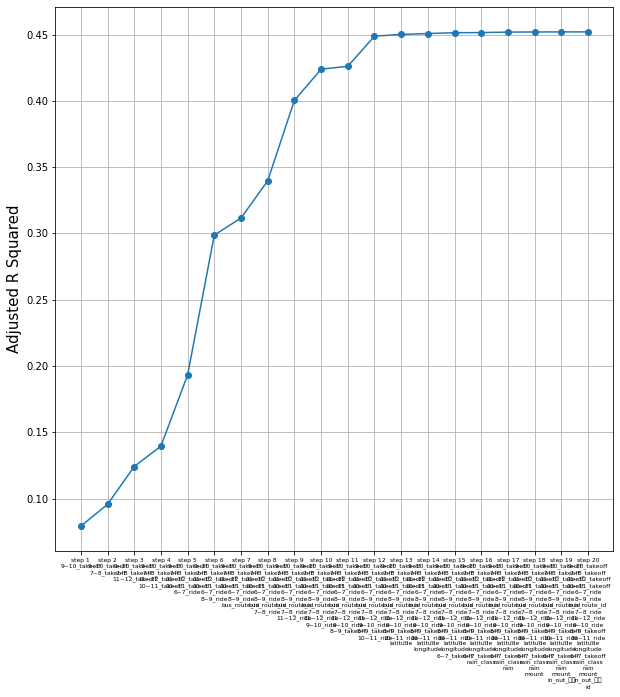

In [26]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=6)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 테스트 데이터셋 전처리

In [27]:
test = pd.read_csv("test.csv")
rain_10 = pd.read_csv("rain_10.csv",encoding='euc-kr')

In [28]:
rain_10.columns = ['지점', '지점명', '일시', '강수량', 'QC']

#오류인 관측치를 0으로 대체
rain_10_2 = rain_10.fillna(0)

#일시를 기준으로 정렬
rain_10_2 = rain_10_2.sort_values(by='일시')
rain_10_2 = rain_10_2.reset_index()

#6시~12시 관측값만 남기기
rain_10_2 = rain_10_2[rain_10_2['일시'].str.contains('07:|08:|09:|10:|11:|12:')]

#동시간 네지역 강수량을 합치기
for i in range (0,len(rain_10_2)-1) :
    if (rain_10_2.iloc[i,3] == rain_10_2.iloc[i+1, 3]) :
        rain_10_2.iloc[i+1,4] += rain_10_2.iloc[i,4]
        
rain_10_2 = rain_10_2.drop_duplicates(['일시'])

#6시~12시 강수량을 일별로 모두 합치기
day_rain_10 = rain_10_2
for i in range (0,len(day_rain_10)-1) :
    if i%6==5 :
        continue
    else :
        day_rain_10.iloc[i+1,4] += day_rain_10.iloc[i,4]
        
day_rain_10 = day_rain_10.reset_index()
day_rain_10 = day_rain_10.drop(['index'],axis=1)

for i in range(0,len(day_rain_10)-1) :
    if i%6==5:
        continue
    else:
        day_rain_10 = day_rain_10.drop(index=i,axis=0)

day_rain_10 = day_rain_10.reset_index()

In [29]:
day_rain_10["일시"] = pd.to_datetime(day_rain_10.일시,format='%Y-%m-%d %H:%M')
day_rain_10["일시"]= day_rain_10["일시"].dt.date
day_rain_10 = day_rain_10.drop(['index','level_0','지점명','지점','QC'], axis=1)

day_rain_10["일시"] = pd.to_datetime(day_rain_10.일시, format="%Y-%m-%d")

In [30]:
day_rain_10

,일시,강수량
0,2019-10-01,0.30000
1,2019-10-02,42.00000
2,2019-10-03,0.20000
3,2019-10-07,0.00000
4,2019-10-08,2.30000
5,2019-10-15,4.30000


In [31]:
day_rain_10 = pd.DataFrame({"일시": pd.date_range("2019-10-01", "2019-10-16", freq="D"),
                          "강수량": [0.3, 42.0, 0.2, np.nan, np.nan, np.nan, 0.0, 2.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                                  4.3, np.nan]})

day_rain_10['강수량'] = day_rain_10["강수량"].interpolate()

day_rain_10.columns = ['date', 'rain']

#비 안옴(0), 약한 비(1), 강한 비(2) 로 구분
rain_class = []

for i in range (len(day_rain_10)):
    if (day_rain_10.iloc[i,1] == 0):
        rain_class.append(0)
    elif (day_rain_10.iloc[i,1] <= 18) :
        rain_class.append(1)
    elif (day_rain_10.iloc[i,1] > 18):
        rain_class.append(2)

day_rain_10["rain_class"] = rain_class

pd.get_dummies(day_rain_10, columns=['rain_class'])

,date,rain,rain_class_0,rain_class_1,rain_class_2
0,2019-10-01,0.30000,0,1,0
1,2019-10-02,42.00000,0,0,1
2,2019-10-03,0.20000,0,1,0
3,2019-10-04,0.15000,0,1,0
4,2019-10-05,0.10000,0,1,0
5,2019-10-06,0.05000,0,1,0
6,2019-10-07,0.00000,1,0,0
7,2019-10-08,2.30000,0,1,0
8,2019-10-09,2.58571,0,1,0
9,2019-10-10,2.87143,0,1,0


In [32]:
mount = []
for i in range(len(test.id)) :
    if ((126.35 < test.iloc[i,7] < 126.72) & (33.3 < test.iloc[i,6] < 33.44)) :
        mount.append(1)
    else :
        mount.append(0)
        
mount = pd.DataFrame(mount)
test = pd.concat([mount,test],axis=1)

In [33]:
test.rename(columns={0:'mount'}, inplace=True)

In [34]:
test["date"] = pd.to_datetime(test.date,format='%Y-%m-%d')

test = pd.merge(day_rain_10,test, on='date', how='inner')

In [35]:
to_log_col = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride' ]
for col in to_log_col:
    train[col] = np.log1p(train[col])

In [36]:
test = pd.get_dummies(test, columns=["in_out"], drop_first=True)

test = test.drop(['date', 'station_name'], axis=1)

## 릿지회귀

In [62]:
X = train.drop(['18~20_ride'],axis=1)
y = train['18~20_ride']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7, test_size=0.3)

ValueError: Found input variables with inconsistent numbers of samples: [290796, 124627]

In [63]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)



print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X,y)))
print("테스트 세트의 정확도 : {:.2f}").format(ridge.score(X_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [290796, 124627]

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}
최적 예측 정확도: 0.4245
